# 1) Import texts and preprocess 

In [82]:
import pandas as pd
import numpy as np

data = pd.read_excel('ecb_pressconferences.xlsx', header = 0, na_values = 'NaN')
data2 = pd.read_excel('ecb_interviews.xlsx', header=0, na_values = 'NaN')
#data = pd.merge_ordered(data1, data2)
#data = data.sort_values('date', ascending=False)
type(data.text[0])
# data.text[0].count(' ')
data.text[0]


# Example text, latest pressconference in 2017 before preprocessing

"Based on our regular economic and monetary analyses, we decided to keep the key ECB interest rates unchanged. We continue to expect them to remain at their present levels for an extended period of time, and well past the horizon of our net asset purchases.\n\nRegarding non-standard monetary policy measures, we confirm that from January 2018 we intend to continue to make net asset purchases under the asset purchase programme (APP), at a monthly pace of €30 billion, until the end of September 2018, or beyond, if necessary, and in any case until the Governing Council sees a sustained adjustment in the path of inflation consistent with its inflation aim. If the outlook becomes less favourable, or if financial conditions become inconsistent with further progress towards a sustained adjustment in the path of inflation, we stand ready to increase the APP in terms of size and/or duration. The Eurosystem will reinvest the principal payments from maturing securities purchased under the APP for 

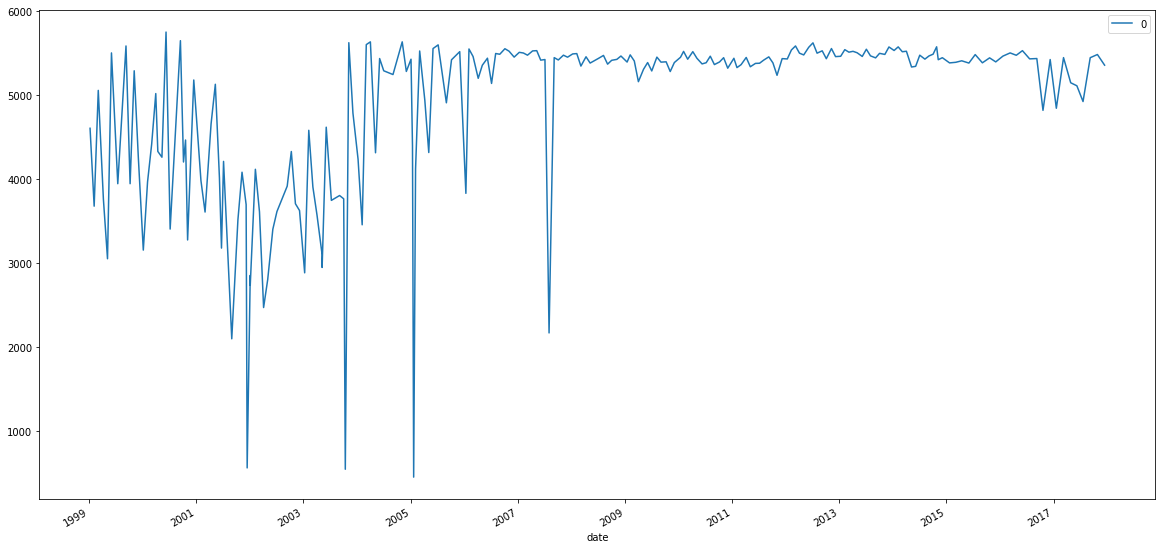

In [83]:
aaa = data.text.tolist()

nr = range(217)
bbb =[]
for x in nr:
    ccc = aaa[x].count(" ")
    
    bbb.append(ccc)
    
# create DataFrame
datum = data.date
ddd = pd.DataFrame(bbb, index = datum)

ddd.plot(kind='line', figsize=(20,10))

# Nr of words per press conference

In [84]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
import string


# preprocessor tokenizes texts first, then strips punctiation, numbers and stopwords (meaningless words) and converts
# entire text to lowercase, Part-of-Speech-tags words to lemmatize subsequently, stem tokens and finally filter for stopwwords
# again. Tokens are joint as a sting and returned.


def preprocessor(clean):
    
    tokens = word_tokenize(clean.lower()) # tokenize text and transform to lowercase
  
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens] # stripped = list
    words = [word for word in stripped if word.isalpha()] # words = list 

    stop_words = stopwords.words('english')
#     stop_words = set(stopwords.words('english'))
#     finterms = pd.read_excel('Finterms_wordlist.xlsx') # include finterm dictionary by Loughran & McDonald (2011)
#     for word in set(finterms.get('lm wordlist')):
#         stop_words.add(word)
    stop_words = [w.lower() for w in stop_words]

    words_cleaned = [w for w in words if not w in stop_words] # tokens in lowercase that are stripped for punctuation

    def get_wordnet_pos(treebank_tag):

        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return None # for easy if-statement 
    
    lemmatizer = WordNetLemmatizer()
    tagged = nltk.pos_tag(words_cleaned)
    lemmatized = []
    
    for word, tag in tagged:
        wntag = get_wordnet_pos(tag)
        if wntag is None:# not supply tag in case of None
            lemma = lemmatizer.lemmatize(word) 
        else:
            lemma = lemmatizer.lemmatize(word, pos=wntag)
        lemmatized.append(lemma)

    ps = PorterStemmer()
    stemmed = []
    for w in lemmatized:
        stemmed.append(ps.stem(w))

    words_preprocessed = [w for w in stemmed if not w in stop_words]
     
    text_preprocessed = " ".join(words_preprocessed)
   
    return text_preprocessed


def dataframe_preprocessor(frame):
   
    for cell in ['text']:
        frame[cell] = frame[cell].apply(preprocessor)
    
    return frame

dataframe_preprocessed = dataframe_preprocessor(data)
dataframe_preprocessed.head()

# dataframe with preprocessed texts

,date,headline,text,type of publication
0,2017-12-14,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017
1,2017-10-26,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi today con...,Press conferences in 2017
2,2017-09-07,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017
3,2017-07-20,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017
4,2017-06-08,"Mario Draghi, Vítor Constâncio: Introductory s...",base regular econom monetari analysi decid kee...,Press conferences in 2017


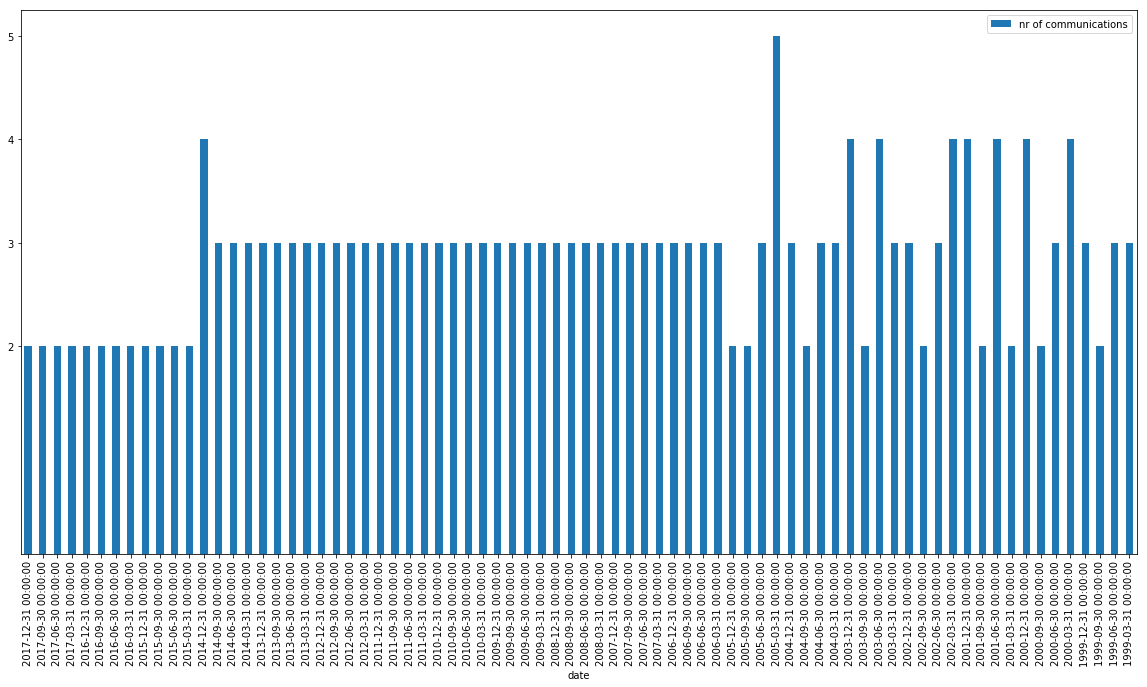

In [207]:
dataframe_preprocessednew = dataframe_preprocessed
dataframe_preprocessednew['nr of communications']= 1

df_preprnew = dataframe_preprocessednew.drop(columns=['headline','text','type of publication'])
df_preprnew['date']=pd.to_datetime(df_preprnew['date'])
df_preprnew=df_preprnew.set_index('date')

df_preprnew = df_preprnew.resample('Q').sum().sort_index(ascending = False)


df_preprnew.plot(kind='bar', yticks=[2,3,4,5],figsize=(20,10))

# Nr. of press conferences per quarter

# 2) Build corpus and create term-frequency-inverse-document-frequency matrix

In [202]:
corpus = dataframe_preprocessed.text.tolist()
print(type(corpus)) 
print(type(corpus[0]))
print(len(corpus)) 
print(len(corpus[0]))
print(corpus[216].count(" "))
corpus[0]


# corpus with preprocessed press conferences

<class 'list'>
<class 'str'>
217
17719
2212


'base regular econom monetari analysi decid keep key ecb interest rate unchang continu expect remain present level extend period time well past horizon net asset purchas regard nonstandard monetari polici measur confirm januari intend continu make net asset purchas asset purchas programm app monthli pace billion end septemb beyond necessari case govern council see sustain adjust path inflat consist inflat aim outlook becom less favour financi condit becom inconsist progress toward sustain adjust path inflat stand readi increas app term size andor durat eurosystem reinvest princip payment matur secur purchas app extend period time end net asset purchas case long necessari contribut favour liquid condit appropri monetari polici stanc monetari polici decis preserv favour financ condit still need sustain return inflat rate toward level close incom inform includ new staff project indic strong pace econom expans signific improv growth outlook strong cyclic momentum signific reduct econom sla

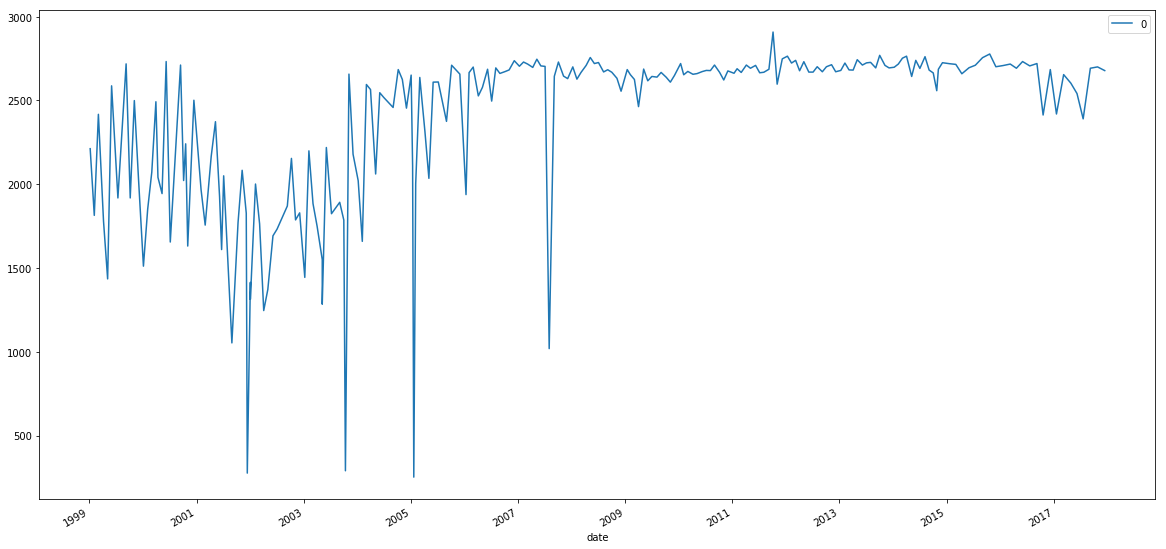

In [203]:
nr = range(217)
acac=[]
for x in nr:
    ababab = corpus[x].count(" ")
    
    acac.append(ababab)
    
# create DataFrame
datum = dataframe_preprocessed.date
abab = pd.DataFrame(acac, index = datum)

abab.plot(kind = 'line', figsize=(20,10))

# Nr. of words after preprocessing

,0
count,217.000000
mean,0.510439
std,0.014213
min,0.433708
25%,0.502024
50%,0.509434
75%,0.518841
max,0.564155


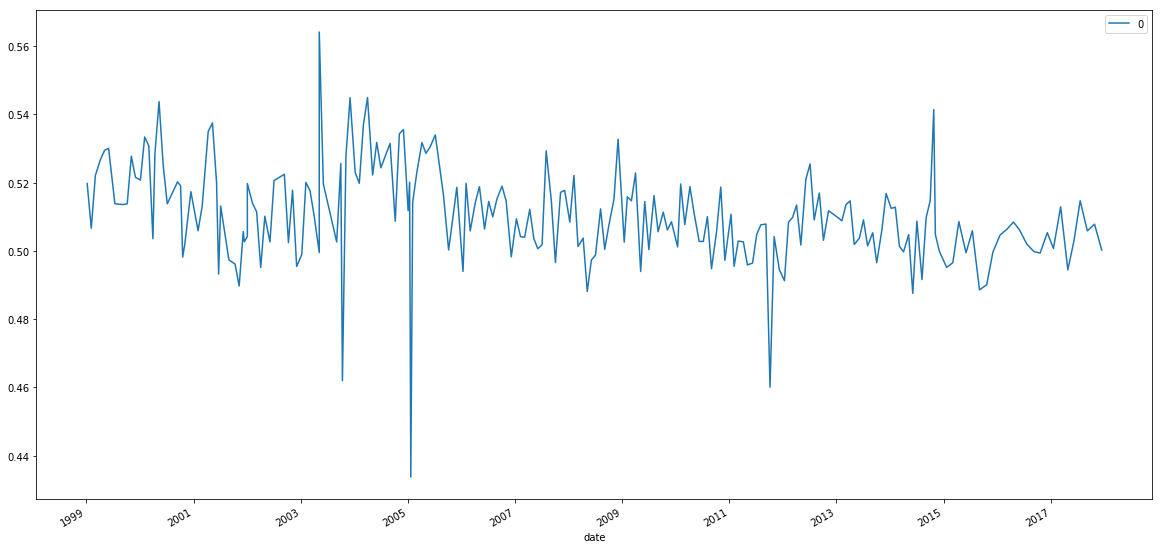

In [204]:
# development stopwords

nr_stop = ddd.sub(abab)
nr_stopperc = nr_stop.divide(ddd)
nr_stopperc.plot(kind = 'line', figsize=(20,10))

nr_stopperc.describe()

# ratio of stopwords erased

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus) # tfidf = sparse csr-matrix
print(tfidf)


# TF-IDF

  (0, 498)	0.010349092971212297
  (0, 4955)	0.005980564530487677
  (0, 1803)	0.10336456285499458
  (0, 3747)	0.18707543219307826
  (0, 238)	0.025167302495430994
  (0, 1415)	0.03953379128028862
  (0, 3198)	0.027606958024682705
  (0, 3201)	0.005295474875661654
  (0, 1796)	0.04209197224344261
  (0, 3039)	0.0660798938901604
  (0, 4820)	0.12271980293886933
  (0, 6328)	0.010542073195459464
  (0, 1201)	0.10336456285499458
  (0, 2107)	0.03793357068282572
  (0, 4993)	0.07621603052850043
  (0, 4580)	0.025872732428030742
  (0, 3346)	0.023708481676766077
  (0, 2142)	0.0443936973823832
  (0, 4357)	0.03556010989723362
  (0, 6107)	0.09821460190136608
  (0, 6691)	0.046768858048269565
  (0, 4307)	0.029924197492294847
  (0, 2782)	0.013772964613399314
  (0, 3870)	0.07504811613444791
  (0, 375)	0.13830651305686884
  :	:
  (216, 6134)	0.022527192244001102
  (216, 910)	0.04593965992099565
  (216, 1754)	0.284389936023736
  (216, 2575)	0.03439804005380587
  (216, 1718)	0.011883551970417048
  (216, 6748)	0.011

In [90]:
words = tfidf_vectorizer.get_feature_names()

# get 25 most important terms of corpus:
feature_array = np.array(words)
tfidf_sorting = np.argsort(tfidf.toarray()).flatten()[::-1]
top_25 = feature_array[tfidf_sorting][:25]
print("Most important 25 terms: {}".format(top_25))

# get 25 most frequent words
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(corpus)
words1 = vectorizer.get_feature_names()
feature_array1 = np.array(words1)
tf_sorting = np.argsort(tf.toarray()).flatten()[::-1]
frequent_25 = feature_array1[tf_sorting][:25]
print("Most frequent 25 terms: {}".format(frequent_25))


# Below the 25 most important words indicated by the tfidf matrix are shown as well as the 25 most frequent words

Most important 25 terms: ['duisenberg' 'rate' 'error' 'gold' 'day' 'teeth' 'problem' 'euro'
 'question' 'exchang' 'payment' 'target' 'euphoria' 'human' 'govern'
 'forese' 'bank' 'system' 'council' 'settl' 'would' 'first' 'januari'
 'price' 'market']
Most frequent 25 terms: ['rate' 'euro' 'question' 'duisenberg' 'day' 'govern' 'problem' 'bank'
 'exchang' 'first' 'council' 'would' 'price' 'market' 'target' 'one'
 'system' 'say' 'develop' 'also' 'interest' 'today' 'time' 'futur' 'issu']


# 3) Derive topics from corpus via NMF

In [99]:
from sklearn.decomposition import NMF
import numpy as np


# Non-negative Matrix Factorization (NMF) allows to classify texts and leads to similar outputs as probablistic Latent
# Semantic Analysis. Comparing outputs containing different quanities of topics derived led to best results of regression 
# if _____ (currently 15)  topics are to be derived

date = dataframe_preprocessed.date
index = pd.DatetimeIndex(date)
idx_to_word = np.array(tfidf_vectorizer.get_feature_names())


# for 3 topics:
model = NMF(n_components=3)

W3 = nmf = model.fit_transform(tfidf)        # W = Tocpics to document
H3 = model.components_                       # H = Terms to topic, factorization matrix
                       
# for i, topic in enumerate(H3):
 
#     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
sums = np.sum(W3, axis=1)
W3_percent = W3 / sums[:, None]

df3 = pd.DataFrame(W3_percent, index)




# for 5 topics:
model = NMF(n_components=5)

W5 = nmf = model.fit_transform(tfidf)        # W = Tocpics to document
H5 = model.components_                       # H = Terms to topic, factorization matrix
                       
# for i, topic in enumerate(H5):
 
#     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
sums = np.sum(W5, axis=1)
W5_percent = W5 / sums[:, None]

df5 = pd.DataFrame(W5_percent, index)




# for 10 topics
model = NMF(n_components=10)

W10 = nmf = model.fit_transform(tfidf)        # W = Tocpics to document
H10 = model.components_                       # H = Terms to topic, factorization matrix
                       
# for i, topic in enumerate(H10):
 
#     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
sums = np.sum(W10, axis=1)
W10_percent = W10 / sums[:, None]

df10 = pd.DataFrame(W10_percent, index)




#for 15 topics:
model = NMF(n_components=15)

W15 = nmf = model.fit_transform(tfidf)        # W = Tocpics to document
H15 = model.components_                       # H = Terms to topic, factorization matrix
                       
# for i, topic in enumerate(H15):
 
#     print("Topic {}: {}".format(i, ", ".join([str(x) for x in idx_to_word[topic.argsort()[-15:]]])))
    
# Currently the attribution for each row in W is not a percentage, but we want to assign each document to any topic which it can be at least 10% attributed to
sums = np.sum(W15, axis=1)
W15_percent = W15 / sums[:, None]

df15 = pd.DataFrame(W15_percent, index)


In [101]:
# If more than _____ (again comparing results to derive optimal value, currently 10% 'topic limit') percent of the text was
# devoted to a derived topic, it counted as mentioned. The code below counts the number of mentionings of the subsequent 
# topic per quarter.





# WICHTIG!!! Werte der Matrix müssen durch sich selbst geteilt werden, damit prozente ableitbar sind! (Github: https://github.com/ewellinger/election_analysis)
# Check percent_treshold in NMF clustering

#How many latent topics should we look for?
#Rundown of the challenges associated with trying to determine the number of topics to factorize into. Include nmf_similarity plot and give a rundown of the thinking behind it as well as the PCA scree plot that gives another approach to the same question.




def topic_selector(value):
    if value < 0.25:
        return 0
    else:
        return 1
        
        
def dataframe_topics(data, i):
    for cell in [i]:
        data[cell] = data[cell].apply(topic_selector)
  
    return data


ii = [0,1,2]
jj = [0,1,2,3,4]
kk = [0,1,2,3,4,5,6,7,8,9]
ll = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
      
for i in ii:
    dfw3 = dataframe_topics(df3,i)
dfw3 = dfw3.resample('Q',).sum().sort_index(ascending = False) # summarize mentions during quarter
    
    
for i in jj:
    dfw5 = dataframe_topics(df5,i)
dfw5 = dfw5.resample('Q',).sum().sort_index(ascending = False) # summarize mentions during quarter


for i in kk:
    dfw10 = dataframe_topics(df10,i) 
dfw10 = dfw10.resample('Q',).sum().sort_index(ascending = False) # summarize mentions during quarter
    
for i in ll:
    dfw15 = dataframe_topics(df15,i)
dfw15 = dfw15.resample('Q',).sum().sort_index(ascending = False) # summarize mentions during quarter
    
    
    
    
# print(dfw.loc[:,dfw.any()]) #check if one topic has 0 mentions higher than 10% of text -> no, if columns are same amount

dfw3.head(), dfw5.head(), dfw10.head(), dfw15.head()

# accumulated number of topic-metionings with 25% per quarter for 3,5,10 and 15 topics

(            0  1  2
 date               
 2017-12-31  0  0  2
 2017-09-30  0  0  2
 2017-06-30  0  0  2
 2017-03-31  0  0  2
 2016-12-31  0  0  2,             0  1  2  3  4
 date                     
 2017-12-31  0  0  2  0  0
 2017-09-30  0  0  2  0  0
 2017-06-30  0  0  2  0  0
 2017-03-31  0  0  2  0  0
 2016-12-31  0  0  2  0  0,             0  1  2  3  4  5  6  7  8  9
 date                                    
 2017-12-31  0  0  2  0  0  0  0  0  0  0
 2017-09-30  0  0  2  0  0  0  0  0  0  0
 2017-06-30  0  0  2  0  0  0  0  0  0  0
 2017-03-31  0  0  2  0  0  0  0  0  0  0
 2016-12-31  0  0  2  0  0  0  0  0  0  0,             0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
 date                                                                  
 2017-12-31   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
 2017-09-30   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
 2017-06-30   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
 2017-03-3

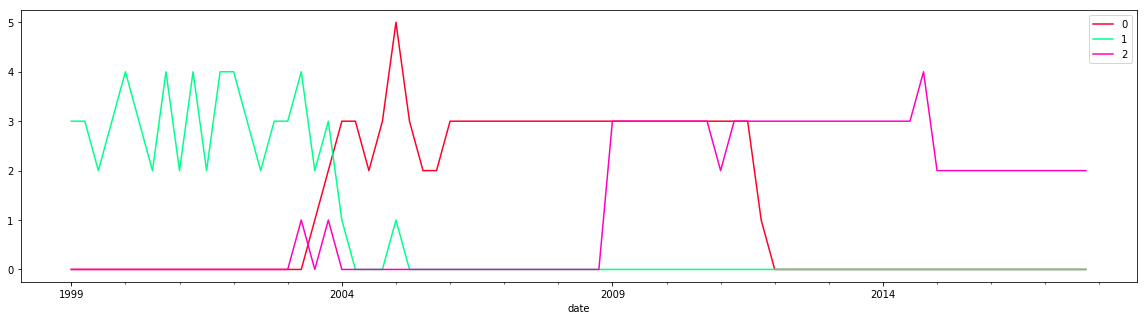

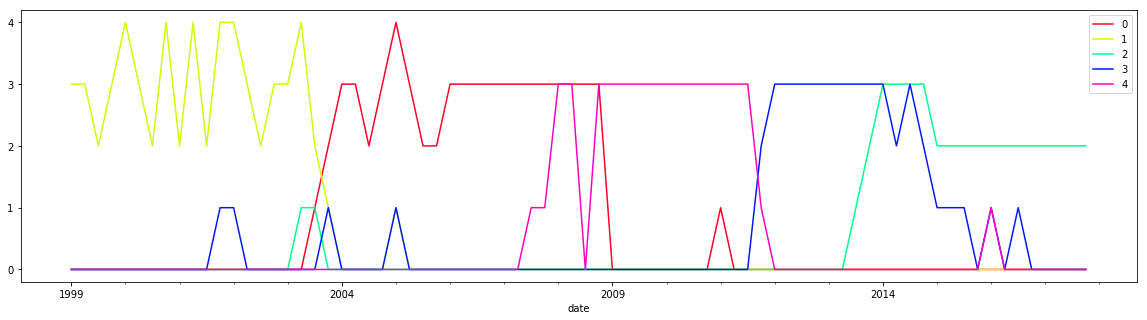

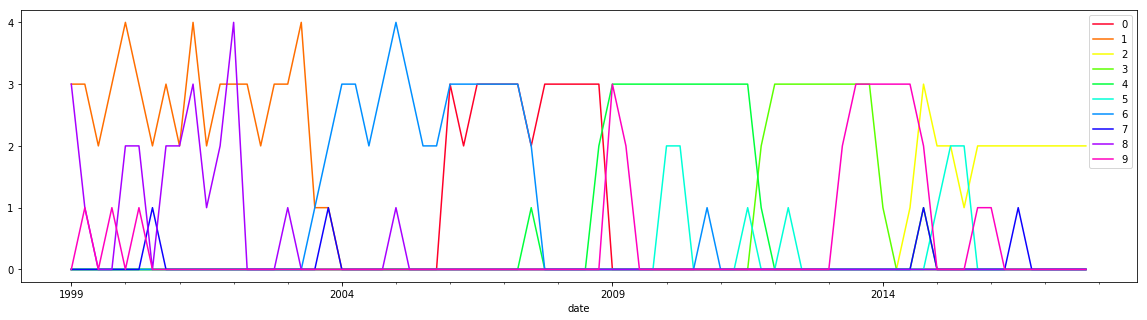

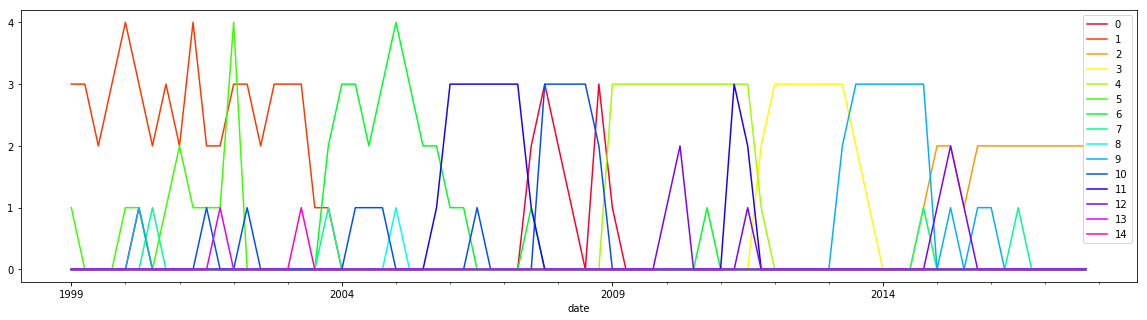

In [104]:
dfw3.plot(kind='line', yticks=[0,1,2,3,4,5], colormap='gist_rainbow',figsize=(20,5))
dfw5.plot(kind='line', yticks=[0,1,2,3,4], colormap='gist_rainbow',figsize=(20,5))
dfw10.plot(kind='line', yticks=[0,1,2,3,4], colormap='gist_rainbow',figsize=(20,5))
dfw15.plot(kind='line', yticks=[0,1,2,3,4], colormap='gist_rainbow',figsize=(20,5))

# importance of topics over time for 3,5,10 and 15 topics model

In [105]:
print(dfw3.sum(), dfw5.sum(), dfw10.sum(), dfw15.sum())
dfw.describe()



0    96
1    62
2    98
dtype: int64 0    62
1    59
2    41
3    45
4    46
dtype: int64 0    34
1    54
2    27
3    28
4    37
5    11
6    46
7     4
8    24
9    29
dtype: int64 0     13
1     52
2     24
3     24
4     34
5     13
6     28
7      4
8      1
9     24
10    20
11    25
12     8
13     1
14     1
dtype: int64


,0,1,2
count,76.000000,76.000000,76.000000
mean,1.263158,0.815789,1.289474
std,1.482056,1.382852,1.374198
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.500000
75%,3.000000,2.000000,3.000000
max,5.000000,4.000000,4.000000


In [109]:
# export matrix to excel file in order to summarize metrions for four (resp. eight) periods

writer3 = pd.ExcelWriter('A.xlsx')
dfw3.to_excel(writer3)
writer3.save()

writer5 = pd.ExcelWriter('B.xlsx')
dfw5.to_excel(writer5)
writer5.save()

writer10 = pd.ExcelWriter('C.xlsx')
dfw10.to_excel(writer10)
writer10.save()

writer15 = pd.ExcelWriter('D.xlsx')
dfw15.to_excel(writer15)
writer15.save()

In [106]:
# variables for visulaization

# H and W
sums = np.sum(H3, axis=1)
H3_percent = H3 / sums[:, None]

print(type(H3_percent))
print(H_percent.shape)

print(type(W3_percent))
print(W_percent.shape)

sums = np.sum(H5, axis=1)
H5_percent = H5 / sums[:, None]

sums = np.sum(H10, axis=1)
H10_percent = H10 / sums[:, None]

sums = np.sum(H15, axis=1)
H15_percent = H15 / sums[:, None]



length = np.asarray(acac)
print(type(length))
print(length.shape)

print(type(feature_array1))
print(feature_array1.shape)

TF = tf.toarray().transpose()
TFF = TF.sum(axis=1)
print(type(TFF))
print(TFF.shape)


<class 'numpy.ndarray'>
(3, 6767)
<class 'numpy.ndarray'>
(217, 3)
<class 'numpy.ndarray'>
(217,)
<class 'numpy.ndarray'>
(6855,)
<class 'numpy.ndarray'>
(6855,)


In [110]:
import pyLDAvis

graph3 = pyLDAvis.prepare(H3_percent,W3_percent, length, feature_array1, TFF, R=20)
pyLDAvis.display(graph3)

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [111]:
graph5 = pyLDAvis.prepare(H5_percent,W5_percent, length, feature_array1, TFF, R=20)
pyLDAvis.display(graph5)

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [112]:
graph10 = pyLDAvis.prepare(H10_percent,W10_percent, length, feature_array1, TFF, R=20)
pyLDAvis.display(graph10)

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [113]:
graph15 = pyLDAvis.prepare(H15_percent,W15_percent, length, feature_array1, TFF, R=20)
pyLDAvis.display(graph15)

C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
C:\Users\Luca Poll\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [116]:
# yearly summarized number of mentions quarterly, topics with no metions deleted
dfw3_annually = pd.read_excel('3topics_agg.xlsx', sheet_name='an', index_col=0)
dfw5_annually = pd.read_excel('5topics_agg.xlsx', sheet_name='an', index_col=0)
dfw10_annually = pd.read_excel('10topics_agg.xlsx', sheet_name='an', index_col=0)
dfw15_annually = pd.read_excel('15topics_agg.xlsx', sheet_name='an', index_col=0)



# 4) Bulid DataFrames for dependent and independent variables

In [169]:
# 1) bulid DataFrame for independent variables

import statsmodels.api as sm

files = ['10_years_int_rate.xlsx','ea_debt.xlsx','euribor_int_rates.xlsx','exchange_rates.xlsx','gdp_growth.xlsx','m3_growth.xlsm','unemployment_rate.xlsx', 'time.xlsx']

dataframes = [pd.ExcelFile(f) for f in files]

intr = dataframes[0].parse('annually_aggregated')
debt = dataframes[1].parse('annually_aggregated')
euribor = dataframes[2].parse('annually_aggregated')
exch = dataframes[3].parse('annually_aggregated')
gdp = dataframes[4].parse('annually_aggregated')
m3 = dataframes[5].parse('annually_aggregated')
unempl = dataframes[6].parse('annually_aggregated')
time = dataframes[7].parse('Tabelle1')

frames = [intr] 
frames.append(euribor.delta_euriday_an)
frames.append(exch.delta_dollar_an) 
frames.append(gdp.delta_gdp_an) 
frames.append(m3.delta_m3_an) 
frames.append(time.fincri)
frames.append(time.year) 

# frames.append(debt.delta_debt_an)
# frames.append(euribor.delta_eurimon_an)
# frames.append(euribor.delta_euri3mon_an) 
# frames.append(euribor.delta_euri6mon_an)
# frames.append(euribor.delta_euri12mon_an) 
# frames.append(exch.delta_pound_an) 
# frames.append(exch.delta_franc_an) 
# frames.append(exch.delta_yen_an) 
# frames.append(unempl.delta_unempl_an)
# frames.append(time.qter) 



new_df = pd.concat(frames, axis=1)


ndf = new_df.set_index('quarter')
ndf = ndf.resample('Q').sum().sort_index(ascending = False)


masterframe3 = pd.concat([dfw3_annually, ndf], axis = 1)
masterframe5 = pd.concat([dfw5_annually, ndf], axis = 1)
masterframe10 = pd.concat([dfw10_annually, ndf], axis = 1)
masterframe15 = pd.concat([dfw15_annually, ndf], axis = 1)
masterframe3.head()



# Prossible control variables are the quarterly data on annually aggregated changes in:

#    - 10 years interest rate (StatisticalDataWarehouse: IRS.M.U2.L.L40.CI.0000.EUR.N.Z) 
#    - Government debt (Eurostat: Quarterly government debt [gov_10q_ggdebt])
#    - euribor rates (Eurostat: Geldmarktzinssätze - Vierteljährliche Daten [irt_st_q])
#    - exchange rates [Pund Sterling, Swiss Franc, Yen, USD] (Eurostat: Euro/Ecu-Wechselkurse - Vierteljährliche Daten [ert_bil_eur_q])
#    - GDP (StatisticalDataWarehouse: MNA.Q.Y.I8.W2.S1.S1.B.B1GQ._Z._Z._Z.EUR.LR.GY)
#    - Money aggregate M3 (StatisticalDataWarehouse: BSI.Q.U2.N.V.M30.X.I.U2.2300.Z01.A)
#    - Unemployment rate (Eurostat: Unemployment by sex and age - quarterly average [une_rt_q])

#    - variable for year
#    - variable for quarter
#    - dummy for financial crisis 07/08

# due to strong correlations within the variables, most are excluded as shown in the next section.
# The ouput contains the mentions of the derived topics along with the selected controll variables. 




,topic0,topic1,topic2,delta_intr_an,delta_euriday_an,delta_dollar_an,delta_gdp_an,delta_m3_an,fincri,year
2017-12-31,0,0,8,0.06,0.00,0.0985,2.550,5.025,0.0,2017.0
2017-09-30,0,0,8,0.50,-0.02,0.0580,2.350,5.125,0.0,2017.0
2017-06-30,0,0,8,0.21,-0.02,-0.0271,2.075,5.100,0.0,2017.0
2017-03-31,0,0,8,0.17,-0.09,-0.0372,1.875,5.100,0.0,2017.0
2016-12-31,0,0,8,-0.27,-0.19,-0.0164,1.775,5.075,0.0,2016.0


In [118]:
# drop most recent 4 (8) pressconferences and macroeconomic variables to measure the influence of the communication on the formation of the forecast
masterframe3_judg = masterframe3.drop(masterframe3.index[0:4])
masterframe3_judg = masterframe3_judg.reset_index()
masterframe3_judg = masterframe3_judg.drop('index', axis=1)

masterframe5_judg = masterframe5.drop(masterframe5.index[0:4])
masterframe5_judg = masterframe5_judg.reset_index()
masterframe5_judg = masterframe5_judg.drop('index', axis=1)

masterframe10_judg = masterframe10.drop(masterframe10.index[0:4])
masterframe10_judg = masterframe10_judg.reset_index()
masterframe10_judg = masterframe10_judg.drop('index', axis=1)

masterframe15_judg = masterframe15.drop(masterframe15.index[0:4])
masterframe15_judg = masterframe15_judg.reset_index()
masterframe15_judg = masterframe15_judg.drop('index', axis=1)
# ndf_judg = ndf.drop(ndf.index[0:4])
# ndf_judg = ndf_judg.reset_index()
# ndf_judg = ndf_judg.drop('quarter', axis=1)
# ndf_judg

In [172]:
masterframe3_judg_24 = masterframe3.drop(masterframe3.index[0:8])
masterframe3_judg_24 = masterframe3_judg_24.reset_index()
masterframe3_judg_24 = masterframe3_judg_24.drop('index', axis=1)

masterframe5_judg_24 = masterframe5.drop(masterframe5.index[0:8])
masterframe5_judg_24 = masterframe5_judg_24.reset_index()
masterframe5_judg_24 = masterframe5_judg_24.drop('index', axis=1)

masterframe10_judg_24 = masterframe10.drop(masterframe10.index[0:8])
masterframe10_judg_24 = masterframe10_judg_24.reset_index()
masterframe10_judg_24 = masterframe10_judg_24.drop('index', axis=1)

masterframe15_judg_24 = masterframe15.drop(masterframe15.index[0:8])
masterframe15_judg_24 = masterframe15_judg_24.reset_index()
masterframe15_judg_24 = masterframe15_judg_24.drop('index', axis=1)



,topic0,topic1,topic2,delta_intr_an,delta_euriday_an,delta_dollar_an,delta_gdp_an,delta_m3_an,fincri,year
count,64.000000,64.000000,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,64.000000,64.000000
mean,0.000000,0.000000,0.000000,-1.006140e-16,1.387779e-17,3.035766e-17,-1.387779e-16,5.689893e-16,0.000000,0.000000
std,5.721028,5.324025,5.583067,6.627564e-01,1.095874e+00,1.269209e-01,1.866271e+00,3.084402e+00,0.333333,4.646214
min,-6.000000,-3.437500,-4.937500,-1.426250e+00,-3.712031e+00,-2.685078e-01,-5.757031e+00,-5.241406e+00,-0.125000,-7.500000
25%,-6.000000,-3.437500,-4.937500,-3.387500e-01,-5.245312e-01,-1.124828e-01,-5.632812e-01,-2.772656e+00,-0.125000,-3.750000
50%,0.500000,-3.437500,-3.937500,-8.625000e-02,1.479687e-01,1.459219e-02,2.929688e-01,3.335938e-01,-0.125000,0.000000
75%,6.000000,6.812500,7.062500,3.262500e-01,5.104688e-01,9.699219e-02,1.136719e+00,2.221094e+00,-0.125000,3.750000
max,7.000000,10.562500,8.062500,1.833750e+00,2.157969e+00,2.156922e-01,2.867969e+00,6.033594e+00,0.875000,7.500000


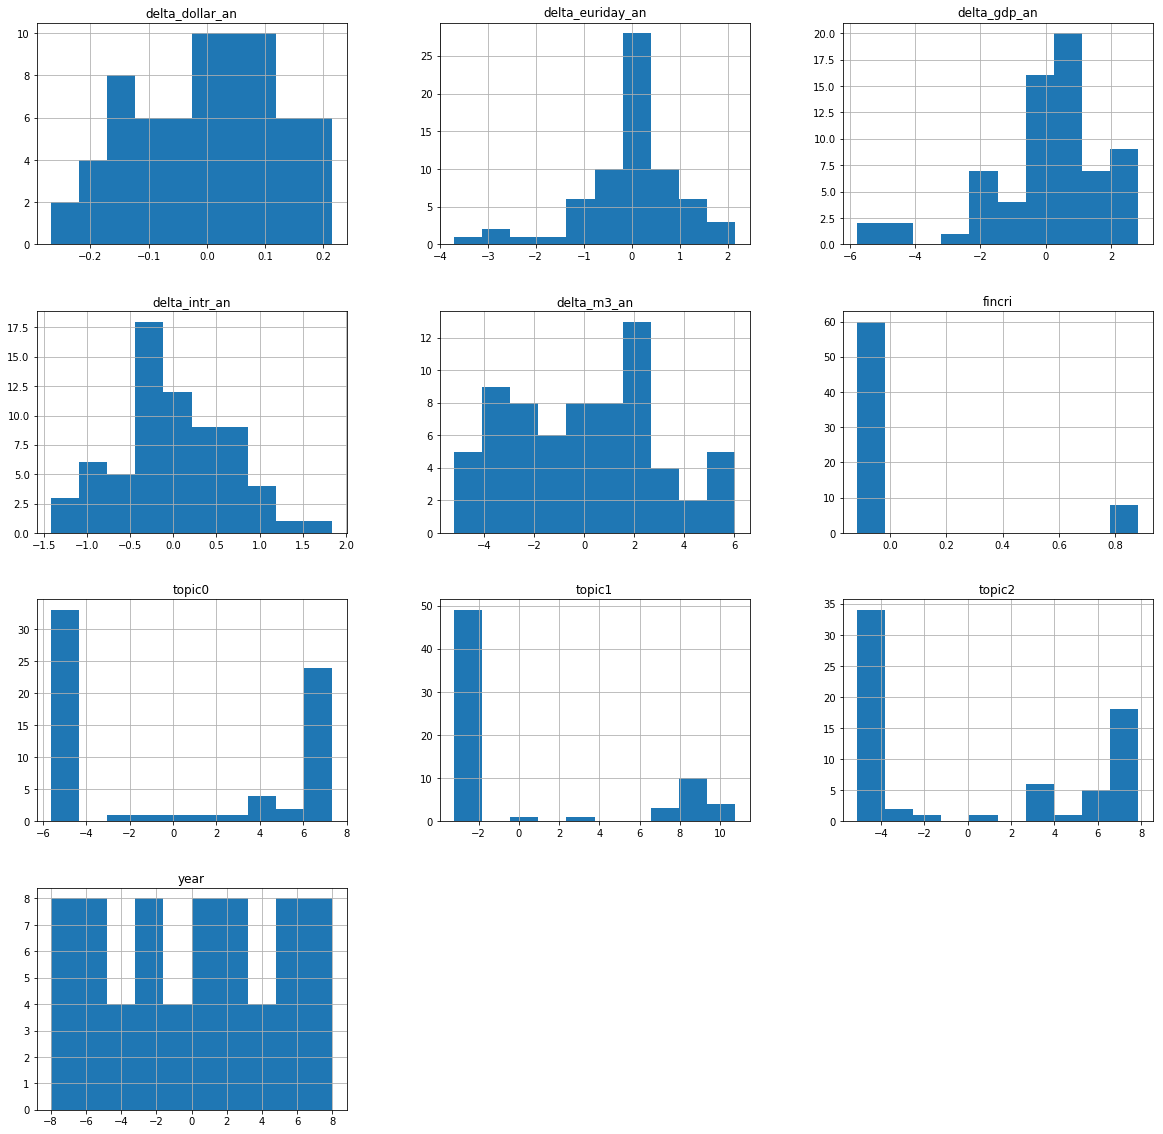

In [189]:
# centrer variables:

def center(df):
    result = df.copy()
    for column_name in df.columns:
        mean = df[column_name].mean()

        result[column_name] = (df[column_name] - mean)
    return result

masterframe3_judg_cent = center(masterframe3_judg)
masterframe5_judg_cent = center(masterframe5_judg)
masterframe10_judg_cent = center(masterframe10_judg)
masterframe15_judg_cent = center(masterframe15_judg)

masterframe3_judg_24_cent = center(masterframe3_judg_24)
masterframe5_judg_24_cent = center(masterframe5_judg_24)
masterframe10_judg_24_cent = center(masterframe10_judg_24)
masterframe15_judg_24_cent = center(masterframe15_judg_24)


masterframe3_judg_cent.hist(figsize = (20,20))

masterframe3_judg_24_cent.describe()
    

In [182]:
# 2) bulid Dataframe for dependent variable


spf_errs = pd.read_excel('SPF_errors.xlsx', sheet_name = 'data')
spf_errs = spf_errs.set_index('quarter')
spf_errs = spf_errs.resample('Q').sum().sort_index(ascending = False)
spf_errs = spf_errs[:69]



# ABSOLUTE VALUES
# spf_errs = spf_errs.abs()
spf_errs





# DataFrame shows the quarterly inflation forecast error of SPF 12 and 24 month rolling forecast.
# The HICP inflation is taken from the ECBs StatisticalDataWarehouse (ICP.M.U2.N.000000.3.ANR),
# as well as the SPF 12 month rolling forecast (SPF.M.U2.HICP.POINT.P12M.Q.AVG) and the 24 month rolling forecast
# (SPF.M.U2.HICP.POINT.P24M.Q.AVG)

,err_12_month,err_24_month
quarter,,
2017-12-31,-0.02,0.11
2017-09-30,-0.29,0.03
2017-06-30,-0.16,0.24
2017-03-31,-0.40,-0.06
2016-12-31,0.05,0.12
2016-09-30,0.70,0.97
2016-06-30,1.11,1.39
2016-03-31,0.98,1.45
2015-12-31,0.56,1.33


In [198]:
spf_errs_judg = spf_errs.reset_index()
spf_errs_judg = spf_errs_judg.drop('quarter', axis=1)

spf_errs_judg

,err_12_month,err_24_month
0,-0.02,0.11
1,-0.29,0.03
2,-0.16,0.24
3,-0.40,-0.06
4,0.05,0.12
5,0.70,0.97
6,1.11,1.39
7,0.98,1.45
8,0.56,1.33
9,1.17,1.77


# 5) Correlations

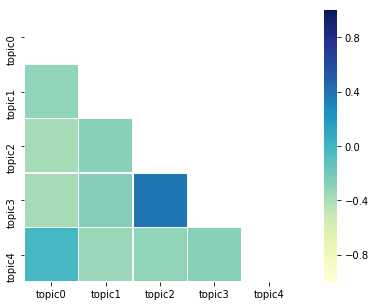

In [146]:
# correlation among topics
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))

mask5 = np.zeros_like(dfw5_annually.corr())
mask5[np.triu_indices_from(mask5)] = True
sns.heatmap(data=dfw5_annually.corr(),mask=mask5,vmin=-1, vmax=1, square=True, cmap="YlGnBu",linewidths=.5, ax=ax)


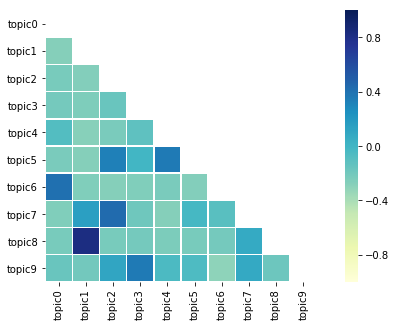

In [149]:
fig, ax = plt.subplots(figsize=(10,5))
mask10 = np.zeros_like(dfw10_annually.corr())
mask10[np.triu_indices_from(mask10)] = True
sns.heatmap(data=dfw10_annually.corr(),mask=mask10,vmin=-1, vmax=1, square=True, cmap="YlGnBu",linewidths=.5, ax=ax)

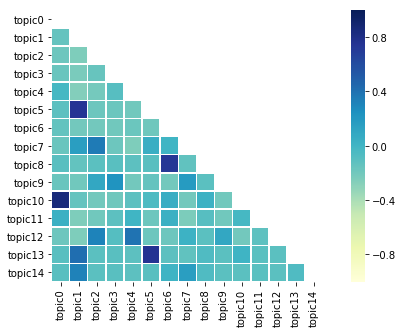

In [151]:
fig, ax = plt.subplots(figsize=(10,5))
mask15 = np.zeros_like(dfw15_annually.corr())
mask15[np.triu_indices_from(mask15)] = True
sns.heatmap(data=dfw15_annually.corr(),mask=mask15,vmin=-1, vmax=1, square=True, cmap="YlGnBu",linewidths=.5, ax=ax)

AxesSubplot(0.241667,0.125;0.503333x0.755)


,delta_intr_an,delta_euriday_an,delta_dollar_an,delta_gdp_an,delta_m3_an,fincri,year
delta_intr_an,1.000000,0.376454,0.136204,0.480582,0.234752,0.241925,-0.229416
delta_euriday_an,0.376454,1.000000,0.054757,0.840554,0.082084,0.237641,-0.110164
delta_dollar_an,0.136204,0.054757,1.000000,0.050760,0.363854,0.306931,-0.186388
delta_gdp_an,0.480582,0.840554,0.050760,1.000000,0.341394,0.232100,-0.267359
delta_m3_an,0.234752,0.082084,0.363854,0.341394,1.000000,0.621812,-0.461888
fincri,0.241925,0.237641,0.306931,0.232100,0.621812,1.000000,-0.068147
year,-0.229416,-0.110164,-0.186388,-0.267359,-0.461888,-0.068147,1.000000


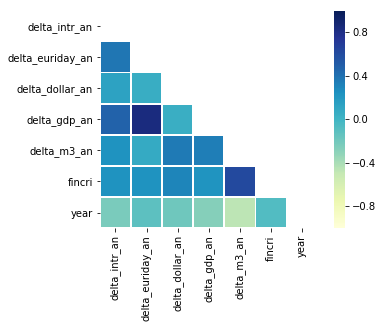

In [126]:
# correlation among control variables

mask = np.zeros_like(ndf.corr())
mask[np.triu_indices_from(mask)] = True
print(sns.heatmap(data=ndf.corr(), mask=mask, vmin=-1, vmax=1, square=True, cmap="YlGnBu",linewidths=.5))
ndf.corr()

# correlations among control variables (>0,5):

# intr, euri6.        0,50                       # euriday, eurimon:   0,99
# intr, euri12:       0,57                       # euriday, euri3mon:  0,98
                                                 # euriday, euri6mon:  0,96
# debt, euriday:      0.65                       # euriday, euri12mon: 0,92
# debt, eurimon:      0,63                       # euriday, gdp:       0,84
# debt, euri3mon:     0,63                       # euriday, unempl:   -0,77
# debt, euri6mon:     0,63                       # eurimon, euri3:     0,99
# debt, euri12mon:    0,57                       # eurimon, euri6:     0,98
# debt, gdp:         -0,71                       # eurimon, euri12:    0,95
# debt, unempl:       0,79                       # eurimon, gdp:       0,86
                                                 # eurimon, unempl:   -0,78
# franc, yen:         0,56                       # eurimon3, euri6:    0,99
# franc, dollar:      0,55                       # eurimon3, euri12:   0,97
# yen, dollar:        0,62                       # eurimon3, gdp:      0,87
                                                 # eurimon3, unempl:  -0,78
# gdp, unempl:       -0,88                       # euri6, euri12:      0,99
                                                 # euri6, gdp:         0,86
# m3, ficri:          0,62                       # euri6, unempl:     -0,77
                                                 # euri12, gdp:        0,84
                                                 # euri12, unempl:    -0,75
        

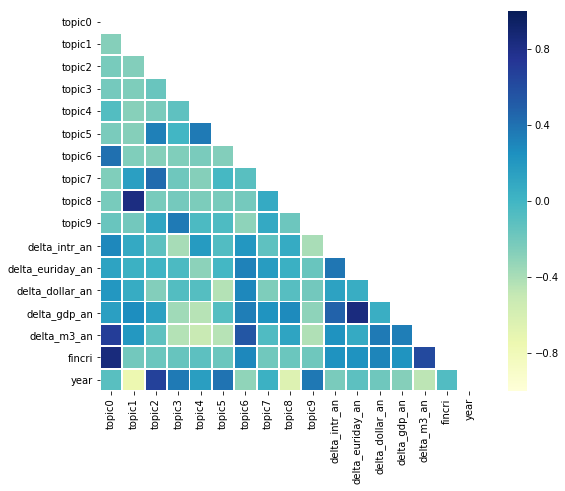

In [155]:
# correlation between topics and controll variables

mask10 = np.zeros_like(masterframe10.corr())
mask10[np.triu_indices_from(mask10)] = True
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data=masterframe10.corr(), mask=mask10, vmin=-1, vmax=1, square=True, cmap="YlGnBu",linewidths=.9, ax=ax)


# 6) Run regressions

In [156]:
# OLS 12 month rolling forecast error
masterframe3_judg_cent_reg = sm.add_constant(masterframe3_judg_cent)
model3 = sm.OLS(spf_errs_judg.err_12_month, masterframe3_judg_cent_reg)
result3 = model3.fit()
print(result3.summary())


# 3 topics on 12 month forecast

                            OLS Regression Results                            
Dep. Variable:           err_12_month   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     4.190
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           0.000226
Time:                        16:22:55   Log-Likelihood:                -70.607
No. Observations:                  68   AIC:                             163.2
Df Residuals:                      57   BIC:                             187.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0982      0.091  

In [161]:
masterframe5_judg_cent_reg = sm.add_constant(masterframe5_judg_cent)
model5 = sm.OLS(spf_errs_judg.err_12_month, masterframe5_judg_cent_reg)
result5 = model5.fit()
print(result5.summary())


# 5 topics on 12 month forecast

                            OLS Regression Results                            
Dep. Variable:           err_12_month   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     7.836
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           3.03e-08
Time:                        16:26:45   Log-Likelihood:                -55.454
No. Observations:                  68   AIC:                             136.9
Df Residuals:                      55   BIC:                             165.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0982      0.074  

In [157]:
masterframe10_judg_cent_reg = sm.add_constant(masterframe10_judg_cent)
model10 = sm.OLS(spf_errs_judg.err_12_month, masterframe10_judg_cent_reg)
result10 = model10.fit()
print(result10.summary())


# 10 topics on 12 month forecast

                            OLS Regression Results                            
Dep. Variable:           err_12_month   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     14.97
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           4.63e-14
Time:                        16:24:04   Log-Likelihood:                -27.919
No. Observations:                  68   AIC:                             91.84
Df Residuals:                      50   BIC:                             131.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0982      0.052  

In [160]:
masterframe15_judg_cent_reg = sm.add_constant(masterframe15_judg_cent)
model15 = sm.OLS(spf_errs_judg.err_12_month, masterframe15_judg_cent_reg)
result15 = model15.fit()
print(result15.summary())


# 15 topics on 12 month forecast

                            OLS Regression Results                            
Dep. Variable:           err_12_month   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     9.393
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           1.80e-10
Time:                        16:25:31   Log-Likelihood:                -30.818
No. Observations:                  68   AIC:                             107.6
Df Residuals:                      45   BIC:                             158.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0982      0.057  

In [196]:
# OLS for 24 month rolling forecast error
masterframe3_judg_24_cent_reg = sm.add_constant(masterframe3_judg_24_cent)
model3b = sm.OLS(spf_errs_judg.err_24_month[:64], masterframe3_judg_24_cent_reg)
result3b = model3b.fit()
print(result3b.summary())


# 3 topics on 24 month forecast

                            OLS Regression Results                            
Dep. Variable:           err_24_month   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     9.316
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           1.12e-08
Time:                        16:57:09   Log-Likelihood:                -58.456
No. Observations:                  64   AIC:                             138.9
Df Residuals:                      53   BIC:                             162.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0722      0.083  

In [199]:
masterframe5_judg_24_cent_reg = sm.add_constant(masterframe5_judg_24_cent)
model5b = sm.OLS(spf_errs_judg.err_24_month[:64], masterframe5_judg_24_cent_reg)
result5b = model5b.fit()
print(result5b.summary())


# 5 topics on 24 month forecast

                            OLS Regression Results                            
Dep. Variable:           err_24_month   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     19.43
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           5.73e-15
Time:                        16:59:13   Log-Likelihood:                -35.952
No. Observations:                  64   AIC:                             97.90
Df Residuals:                      51   BIC:                             126.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0722      0.059  

In [200]:
masterframe10_judg_24_cent_reg = sm.add_constant(masterframe10_judg_24_cent)
model10b = sm.OLS(spf_errs_judg.err_24_month[:64], masterframe10_judg_24_cent_reg)
result10b = model10b.fit()
print(result10b.summary())


# 10 topics on 24 month forecast

                            OLS Regression Results                            
Dep. Variable:           err_24_month   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     14.51
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           3.91e-13
Time:                        16:59:19   Log-Likelihood:                -31.702
No. Observations:                  64   AIC:                             99.40
Df Residuals:                      46   BIC:                             138.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0722      0.059  

In [201]:
masterframe15_judg_24_cent_reg = sm.add_constant(masterframe15_judg_24_cent)
model15b = sm.OLS(spf_errs_judg.err_24_month[:64], masterframe15_judg_24_cent_reg)
result15b = model15b.fit()
print(result15b.summary())


# 15 topics on 24 month forecast

                            OLS Regression Results                            
Dep. Variable:           err_24_month   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     9.792
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           3.35e-10
Time:                        16:59:23   Log-Likelihood:                -32.254
No. Observations:                  64   AIC:                             110.5
Df Residuals:                      41   BIC:                             160.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0722      0.063  